In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("placement.csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [3]:
df.shape

(200, 2)

Text(0, 0.5, 'package')

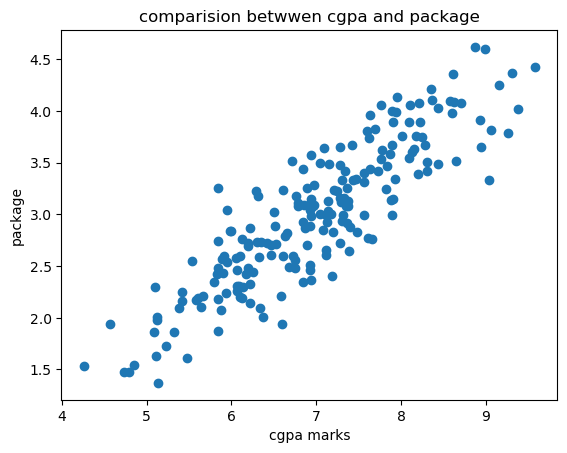

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.title('comparision betwwen cgpa and package')
plt.xlabel('cgpa marks')
plt.ylabel('package')

In [5]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [7]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(x_train,y_train )

LinearRegression()

Text(0, 0.5, 'package')

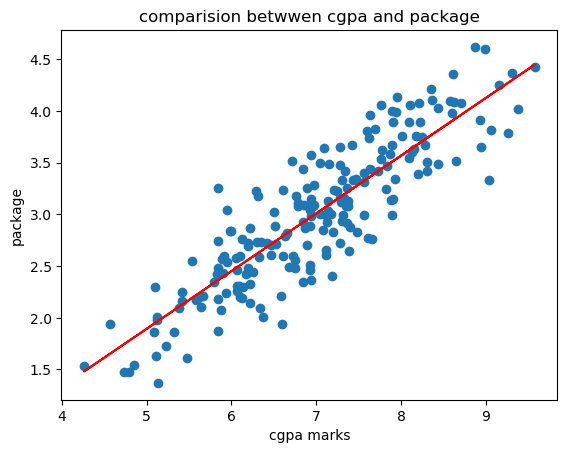

In [12]:
plt.scatter(df['cgpa'],df['package'])

plt.plot(x_train,lr.predict(x_train),color = 'red')
plt.title('comparision betwwen cgpa and package')
plt.xlabel('cgpa marks')
plt.ylabel('package')

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [14]:
y_pred = lr.predict(x_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [15]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [16]:
print("mean_absolute_error = ",mean_absolute_error(y_test,y_pred))

mean_absolute_error =  0.2884710931878175


In [17]:
print("mean_squared_error = ",mean_squared_error(y_test,y_pred))

mean_squared_error =  0.12129235313495527


In [18]:
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE =  0.34827051717731616


In [19]:
print("r2_score = ",r2_score(y_test,y_pred))

r2_score =  0.780730147510384


In [20]:
r2 = r2_score(y_test,y_pred)

In [21]:
# Adjustred re_score

x_test.shape

(40, 1)

In [22]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [23]:
# adding new columns the  dataset for checking the r2 score and Adjusted R2 Score

new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.882271,3.26
1,5.12,0.389032,1.98
2,7.82,0.044219,3.25
3,7.42,0.112695,3.67
4,6.94,0.681271,3.57


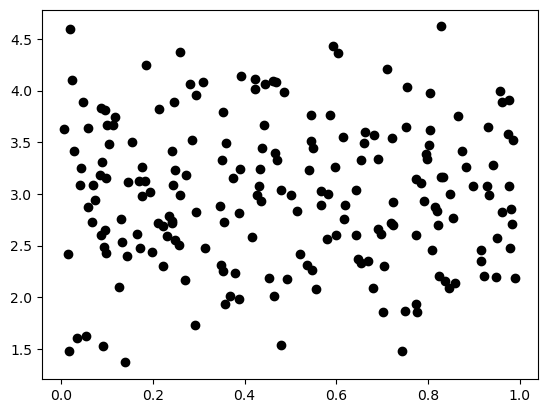

In [24]:
plt.scatter(new_df1['random_feature'],new_df1['package'],color = 'black')

In [25]:
X = new_df1.iloc[:,0:2]
Y = new_df1.iloc[:,-1]

In [26]:
X

,cgpa,random_feature
0,6.89,0.882271
1,5.12,0.389032
2,7.82,0.044219
3,7.42,0.112695
4,6.94,0.681271
...,...,...
195,6.93,0.809590
196,5.89,0.950128
197,7.21,0.389207
198,7.63,0.294716


In [27]:
Y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [29]:
Y_train.shape

(160,)

In [30]:
lr.fit(X_train,Y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test)

In [32]:
print(r2_score(y_test,y_pred))

0.7937829941159857


In [33]:
r2 = r2_score(y_test,y_pred)

In [34]:
1-((1-r2)*(40-1)/(40-1-2))

0.782636128933066